# Continuous Control

---

This is the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program. This notebook implements Deep Determistic Policy Gradient Algorithm (DDPG) to solve the second version of the Reacher environment.

### 1. Start the Environment

Check the README file to install the required dependencies and the Reacher environment files.

### Training the agent

First, we import the required dependencies

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from ddpg import DDPGAgent
import torch
from collections import deque
from train import train_loop
import yaml


/home/jglara/.pyenv/versions/3.9.2/envs/RL/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load the hyperparameters from the yaml file

In [2]:
# Hyper parameters                                                                                                                                                                                             
params = yaml.load(open("parameters.yaml"), Loader=yaml.FullLoader)["parameters"]                                                                                                                              
                                                                                                                                                                                              
                    


Load the environment ( for the training phase is better to use no visualization ), and the create the Agent and start the training loop with the goal of 30.0 average reward

Start the training loop. When the goal of 30 average rewards is reached, the weights are saved, and the average rewards plot is shown

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")                                                                                                                                        
                                                                                                                                                                                                                   
env = UnityEnvironment(file_name='./Reacher_Linux_NoVis_v2/Reacher.x86_64')                                                                                                                                    
                                                                                                                                                                                                                   
# get the default brain                                                                                                                                                                                        
brain_name = env.brain_names[0]                                                                                                                                                                                
brain = env.brains[brain_name]                                                                                                                                                                                 
                                                                                                                                                                                                                   
env_info = env.reset(train_mode=True)[brain_name]                                                                                                                                                              
action_size = brain.vector_action_space_size                                                                                                                                                                   
states = env_info.vector_observations                                                                                                                                                                          
state_size = states.shape[1]                                                                                                                                                                                   
num_agents = len(env_info.agents)                                                                                                                                                                              
print(f"agents = {num_agents} . Action space: {action_size} observation space: {state_size}")                                                                                                                  
agent = DDPGAgent(state_size, action_size, device=device, **params)                                                                                                                                            
                                                                                                                                                                                                                   
scores = train_loop(brain_name, env, agent, max_t=1000, goal=30.0, running_average=100, **params)    

Found path: /home/jglara/DEV/RL/Policy-based-methods/./Reacher_Linux_NoVis_v2/Reacher.x86_64
Mono path[0] = '/home/jglara/DEV/RL/Policy-based-methods/./Reacher_Linux_NoVis_v2/Reacher_Data/Managed'
Mono config path = '/home/jglara/DEV/RL/Policy-based-methods/./Reacher_Linux_NoVis_v2/Reacher_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/jglara/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


agents = 20 . Action space: 4 observation space: 33
Episode 100 	Average Score: 28.32
Episode 105 	Average Score: 30.06
Environment solved in 105 episodes!	Average Score: 30.06


In [4]:
env.close()

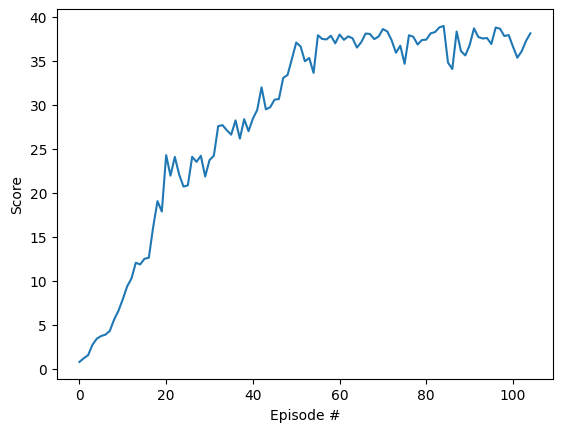

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [5]:
plt.savefig("scores.png")

<Figure size 640x480 with 0 Axes>